# Add functionality to existing graph styles

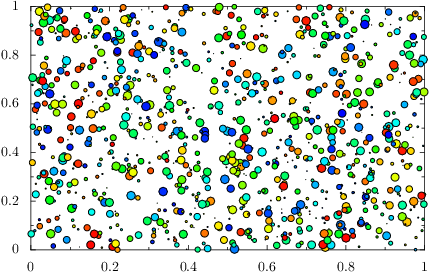

In [1]:
import random
from pyx import *

# introduce a new symbol style where size and color are given by some data
class changesymbol(graph.style.symbol):

    def __init__(self, sizecolumnname="size", colorcolumnname="color",
                       gradient=color.gradient.Rainbow,
                       symbol=graph.style.symbol.circle,
                       symbolattrs=[deco.filled, deco.stroked([color.gray.black])],
                       **kwargs):
        # add some configuration parameters and modify some other
        self.sizecolumnname = sizecolumnname
        self.colorcolumnname = colorcolumnname
        self.gradient = gradient
        graph.style.symbol.__init__(self, symbol=symbol, symbolattrs=symbolattrs, **kwargs)

    def columnnames(self, privatedata, sharedata, agraph, columnnames, dataaxisnames):
        # register the new column names
        if self.sizecolumnname not in columnnames:
            raise ValueError("column '%s' missing" % self.sizecolumnname)
        if self.colorcolumnname not in columnnames:
            raise ValueError("column '%s' missing" % self.colorcolumnname)
        return ([self.sizecolumnname, self.colorcolumnname] +
                graph.style.symbol.columnnames(self, privatedata, sharedata, agraph,
                                               columnnames, dataaxisnames))

    def drawpoint(self, privatedata, sharedata, graph, point):
        # replace the original drawpoint method by a slightly revised one
        if sharedata.vposvalid and privatedata.symbolattrs is not None:
            x_pt, y_pt = graph.vpos_pt(*sharedata.vpos)
            color = self.gradient.getcolor(point[self.colorcolumnname])
            privatedata.symbol(privatedata.symbolcanvas, x_pt, y_pt,
                               privatedata.size_pt*point[self.sizecolumnname],
                               privatedata.symbolattrs + [color])

g = graph.graphxy(width=10)
g.plot(graph.data.points([[random.random() for i in range(4)]
                          for i in range(1000)],
                         x=1, y=2, size=3, color=4),
       [changesymbol()])
g

<img src="http://pyx.sourceforge.net/bend.png" align="left"> In this example demonstrate how graph styles can be modified to add further
functionality to them.  Here we create changesymbol styles based on PyX's
symbol style. For that two additional column names are introduced that way,
that they can be modified in the constructor of the style. The column names are
then registered by the adjusted version of the `columnnames` method. After that
we only need to replace the drawpoint method by a modified version, which
implements the additional functionality. This new created style can than be
used like any other graph style.
